In [1]:
%matplotlib inline

In [2]:
from keras.layers import Dense, Activation, LSTM
from keras.models import Sequential
from keras.optimizers import SGD

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

from statsmodels.datasets.co2 import load_pandas

/usr/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
co2 = load_pandas().data
co2.interpolate(inplace=True)

In [4]:
scaler = MinMaxScaler((-1, 1))
scaler.fit(co2)
train, test = train_test_split([x[0] for x in scaler.transform(co2)], shuffle=False)

In [6]:
X, y = (train[:-1], train[1:])

In [28]:
model = Sequential([
    LSTM(1, batch_input_shape=(32,1,1)),
    Dense(1)
])

In [29]:
sgd_optimizer = SGD(lr=.05, momentum=.5)
model.compile(optimizer=sgd_optimizer, loss='mean_squared_error')


In [30]:
model.fit(X, y, epochs=500, batch_size=36)

ValueError: Error when checking input: expected lstm_10_input to have 3 dimensions, but got array with shape (1712, 1)

In [80]:
model.evaluate(X_test, y_test)

559/559 [==============================] - 0s 99us/step


0.011875946387941807

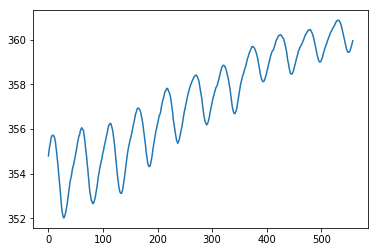

In [81]:
plt.plot(scaler.inverse_transform(model.predict(X_test)))